### HW3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

#### Question 2

#### Question 2.1

In [2]:
data = pd.read_csv("n90pol.csv")
data.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


##### Histogram

In [3]:
# Calculate the number of bins for amygdala. Computation method derived from https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
amygdala_data = np.array(data["amygdala"])
q1 = np.percentile(amygdala_data, 25)
q3 = np.percentile(amygdala_data, 75)
iqr = q3 - q1
bw = 2 * iqr * 90 ** (-1 / 3)
amy_bin_size = np.ceil((np.max(amygdala_data) - np.min(amygdala_data)) / bw).astype(int)
amy_bin_size

np.int64(8)

In [4]:
# Calculate the number of bins for acc
acc_data = np.array(data["acc"])
q1 = np.percentile(acc_data, 25)
q3 = np.percentile(acc_data, 75)
iqr = q3 - q1
bw = 2 * iqr * 90 ** (-1 / 3)
acc_bin_size = np.ceil((np.max(acc_data) - np.min(acc_data)) / bw).astype(int)
acc_bin_size

np.int64(9)

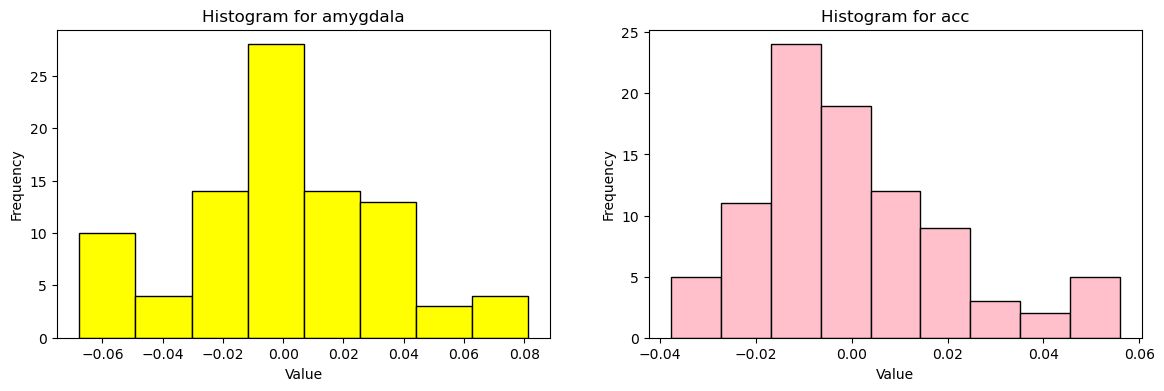

In [5]:
# Plot the histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(data["amygdala"], bins=amy_bin_size, color="Yellow", edgecolor="black")
axes[0].set_title("Histogram for amygdala")


axes[1].hist(data["acc"], bins=acc_bin_size, color="Pink", edgecolor="black")
axes[1].set_title("Histogram for acc")

for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.show()

##### KDE Plots

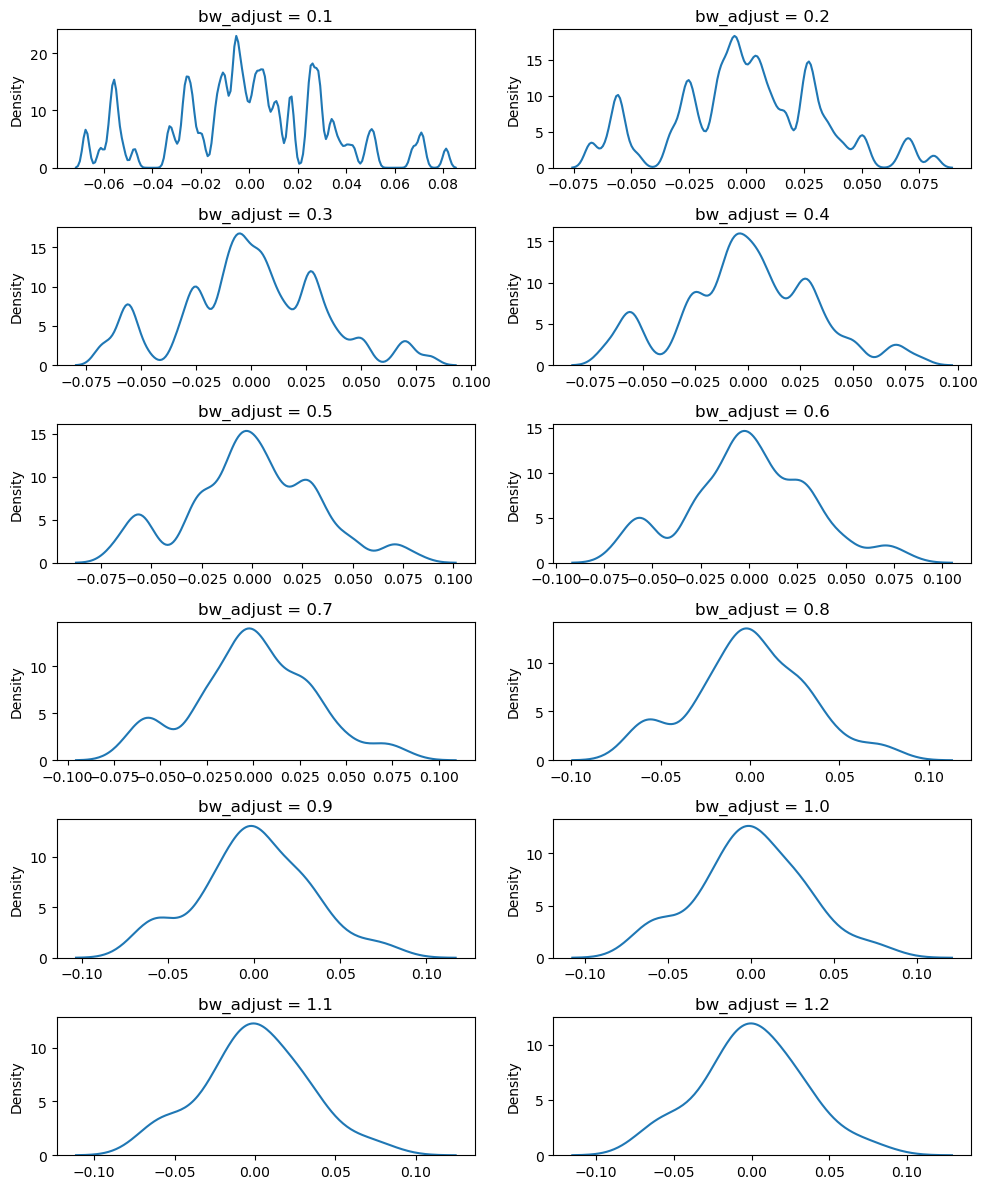

In [6]:
# Plot KDE for amygdala variable
bw_adjust = np.arange(0.1, 1.3, 0.1)

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 12))
axs = axs.flatten()

for indx, i in enumerate(bw_adjust):
    sns.kdeplot(amygdala_data, bw_adjust=i, ax=axs[indx])
    axs[indx].set_title(f"bw_adjust = {np.round(i,1)}")

plt.tight_layout()
plt.show()

In [7]:
# Retrieve the actual bandwidth h. Example from https://stackoverflow.com/questions/23630515/getting-bandwidth-used-by-scipys-gaussian-kde-function#:~:text=The%20bandwidth%20is%20kernel.,thumb%20in%20the%20default%20case).
kernel = gaussian_kde(amygdala_data)
bw = kernel.covariance_factor() * np.std(amygdala_data)
actual_bw = bw * 0.9  # Pick bw_adjust = 0.9 based on the plots above
actual_bw

np.float64(0.011864703877538083)

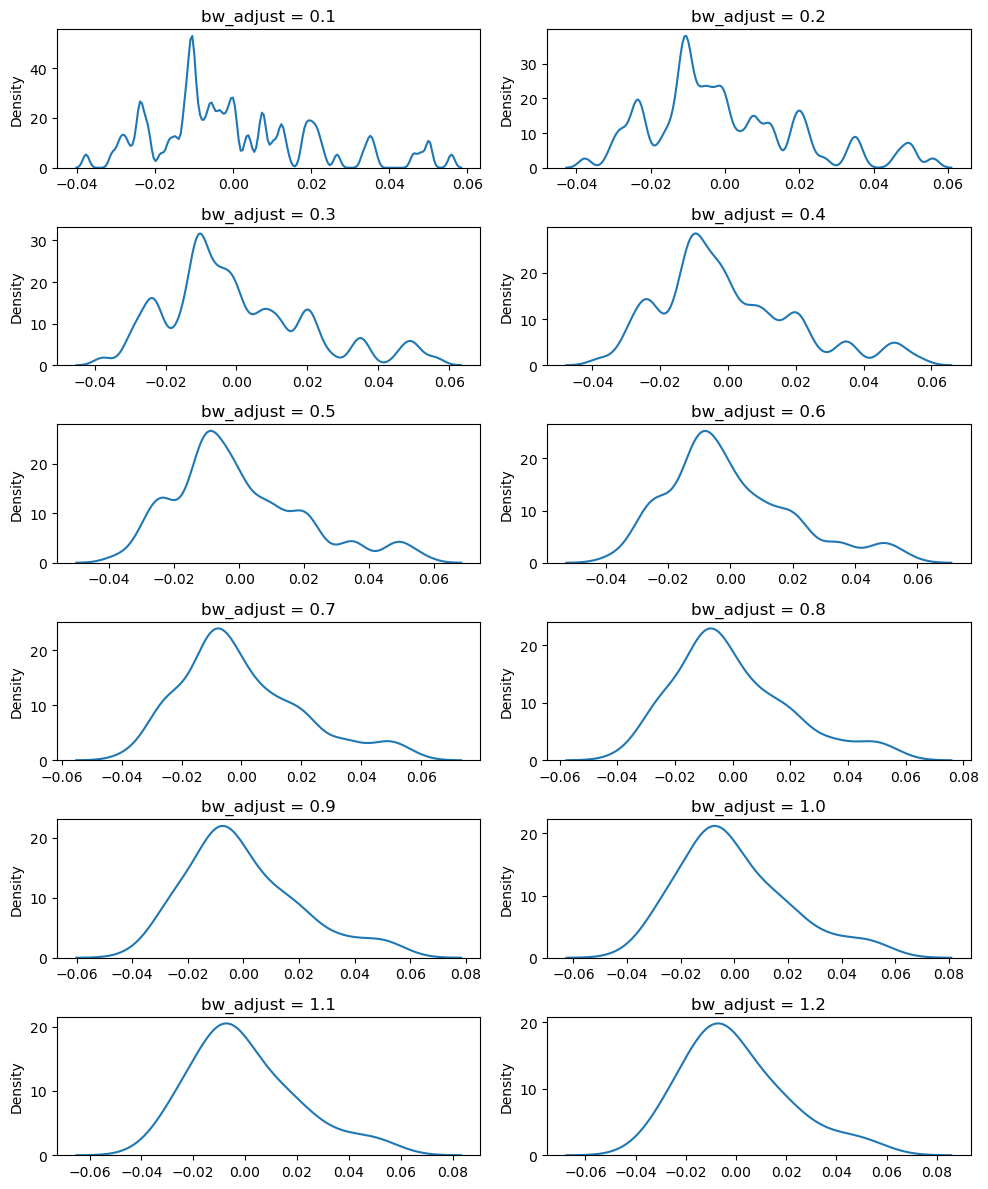

In [8]:
# Plot KDE for acc variable
bw_adjust = np.arange(0.1, 1.3, 0.1)

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 12))
axs = axs.flatten()

for indx, i in enumerate(bw_adjust):
    sns.kdeplot(acc_data, bw_adjust=i, ax=axs[indx])
    axs[indx].set_title(f"bw_adjust = {np.round(i,1)}")

plt.tight_layout()
plt.show()

In [9]:
# Retrieve the actual bandwidth h. Example from https://stackoverflow.com/questions/23630515/getting-bandwidth-used-by-scipys-gaussian-kde-function#:~:text=The%20bandwidth%20is%20kernel.,thumb%20in%20the%20default%20case).
kernel = gaussian_kde(acc_data)
bw = kernel.covariance_factor() * np.std(acc_data)
actual_bw = bw * 1.0  # Pick bw_adjust = 1.0 based on the plots above
actual_bw

np.float64(0.008262433703070296)

#### Question 2.2

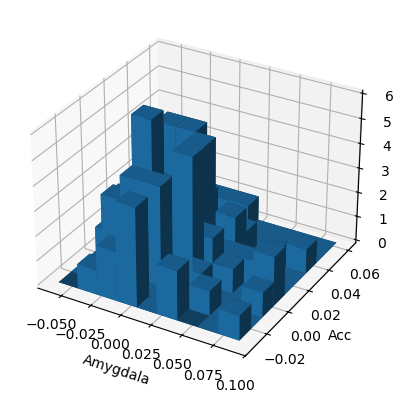

In [10]:
# Code is adapted from the demo code
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
hist, xedges, yedges = np.histogram2d(amygdala_data, acc_data, bins=9)

xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])
xpos = xpos.flatten() / 2.0
ypos = ypos.flatten() / 2.0
zpos = np.zeros_like(xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

ax.set_xlabel("Amygdala")
ax.set_ylabel("Acc")
plt.show()

#### Question 2.3

In [11]:
def create_3D_KDE(comb_data):
    amy_min = np.min(comb_data[:, 0])
    amy_max = np.max(comb_data[:, 0])
    acc_min = np.min(comb_data[:, 1])
    acc_max = np.max(comb_data[:, 1])

    gridno = 40

    # Code adapted from demo code and https://stackoverflow.com/questions/66219947/3d-data-contour-ploting-using-a-kde
    inc1 = (amy_max - amy_min) / gridno
    inc2 = (acc_max - acc_min) / gridno

    x_grid, y_grid = np.meshgrid(
        np.arange(amy_min, amy_max + inc1, inc1),
        np.arange(acc_min, acc_max + inc2, inc2),
    )

    grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])

    return (grid_coords, x_grid, y_grid)

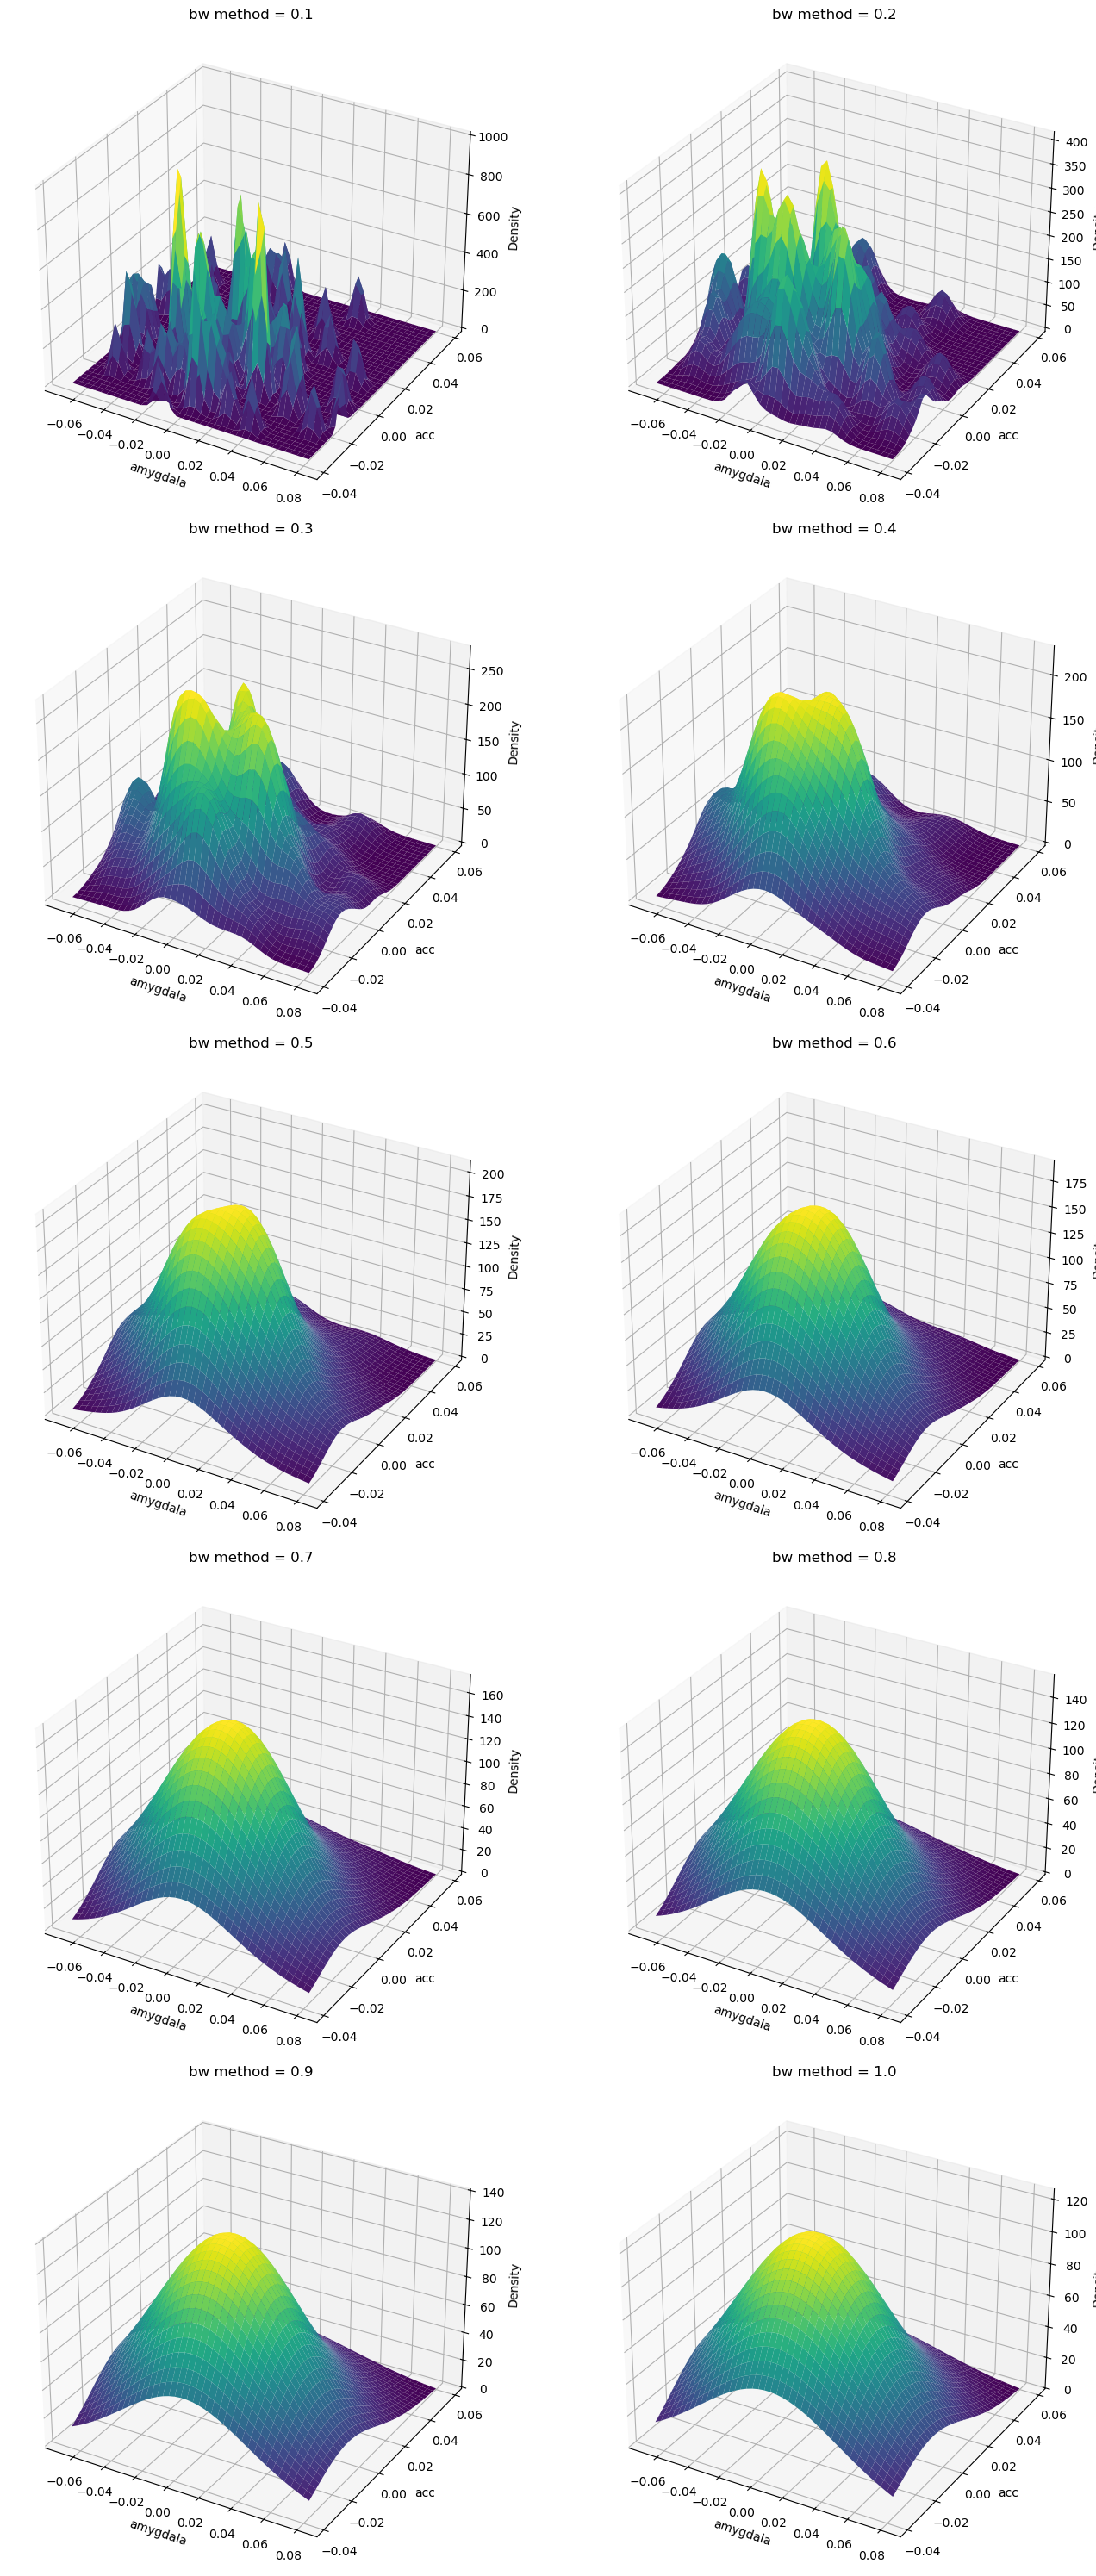

In [12]:
comb_data = data[["amygdala", "acc"]].to_numpy()

grid_coords, x_grid, y_grid = create_3D_KDE(comb_data)

bw_method = np.arange(0.1, 1.1, 0.1)

fig, axs = plt.subplots(5, 2, figsize=(15, 30), subplot_kw={"projection": "3d"})
axs = axs.flatten()

for ax, bw in zip(axs, bw_method):
    kde = gaussian_kde(comb_data.T, bw_method=bw)
    z_grid = kde(grid_coords).reshape(x_grid.shape)

    ax.plot_surface(x_grid, y_grid, z_grid, cmap="viridis", edgecolor="none")
    ax.set_title(f"bw method = {np.round(bw,1)}")
    ax.set_xlabel("amygdala")
    ax.set_ylabel("acc")
    ax.set_zlabel("Density")

plt.tight_layout()
plt.show()

In [13]:
# Retrieve actual kernel bandwidth
kernel = gaussian_kde(comb_data.T, bw_method=1.0)
kernel_bw = kernel.covariance
np.round(kernel_bw)
kernel_bw

array([[ 1.06311022e-03, -8.56093196e-05],
       [-8.56093196e-05,  4.17604800e-04]])

In [14]:
from sklearn.metrics import mutual_info_score

# Check whether amygdala and acc are independent via mutual information
# See example at https://www.blog.trainindata.com/mutual-information-with-python/
mi = mutual_info_score(amygdala_data, acc_data)
mi

c:\Users\jm121\miniconda3\envs\general_env\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


np.float64(4.355366365954226)

#### Question 2.4

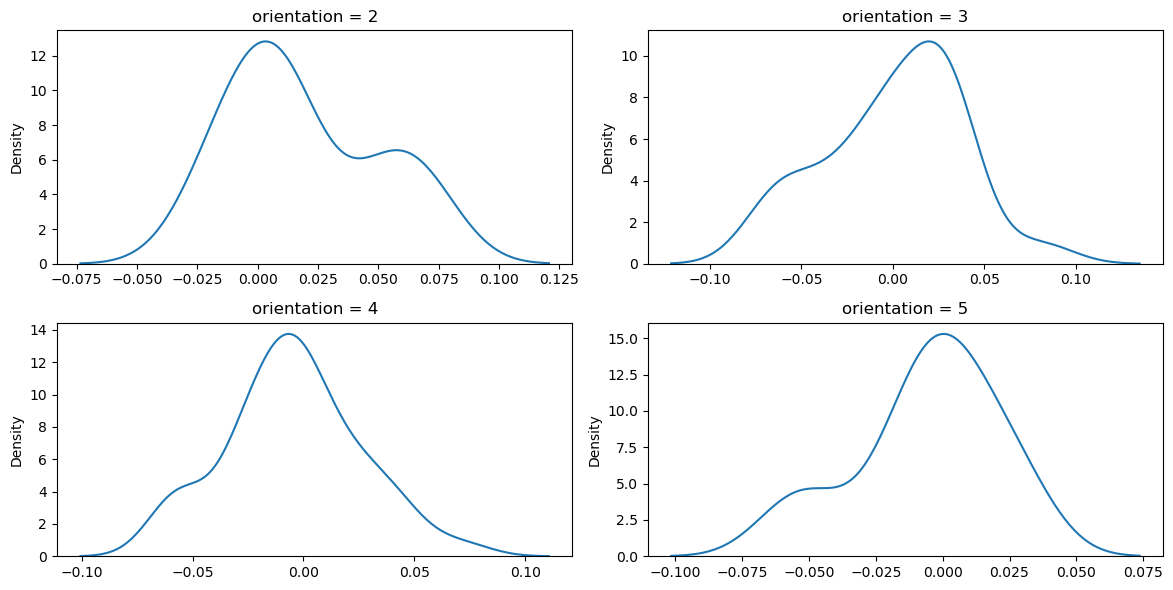

In [15]:
c = [2, 3, 4, 5]

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
amy_mean = []
axs = axs.flatten()

for index, i in enumerate(c):
    amy_data = data.loc[data["orientation"] == i, "amygdala"]
    amy_mean.append(np.mean(amy_data))
    amy_data = amy_data.to_numpy()
    sns.kdeplot(amy_data, bw_adjust=0.9, ax=axs[index])
    axs[index].set_title(f"orientation = {i}")

plt.tight_layout()
plt.show()

In [16]:
np.round(amy_mean, 2)

array([ 0.02,  0.  , -0.  , -0.01])

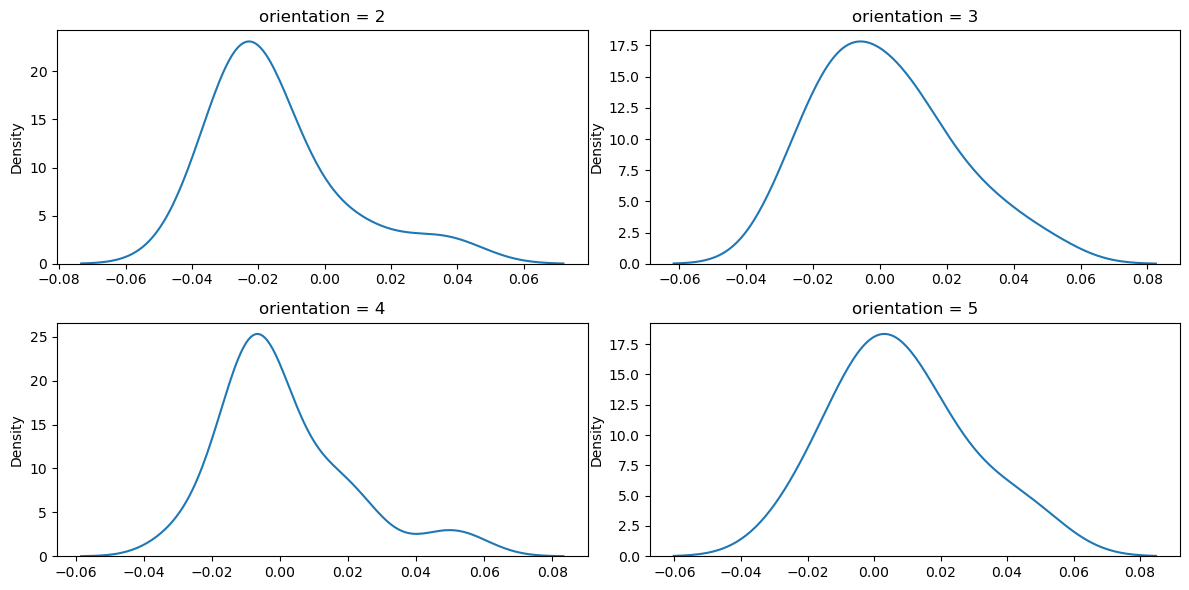

In [17]:
c = [2, 3, 4, 5]

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
acc_mean = []
axs = axs.flatten()

for index, i in enumerate(c):
    acc_data = data.loc[data["orientation"] == i, "acc"]
    acc_mean.append(np.mean(acc_data))
    acc_data = acc_data.to_numpy()
    sns.kdeplot(acc_data, bw_adjust=1.0, ax=axs[index])
    axs[index].set_title(f"orientation = {i}")

plt.tight_layout()
plt.show()

In [18]:
np.round(acc_mean, 2)

array([-0.01,  0.  ,  0.  ,  0.01])

#### Question 2.5

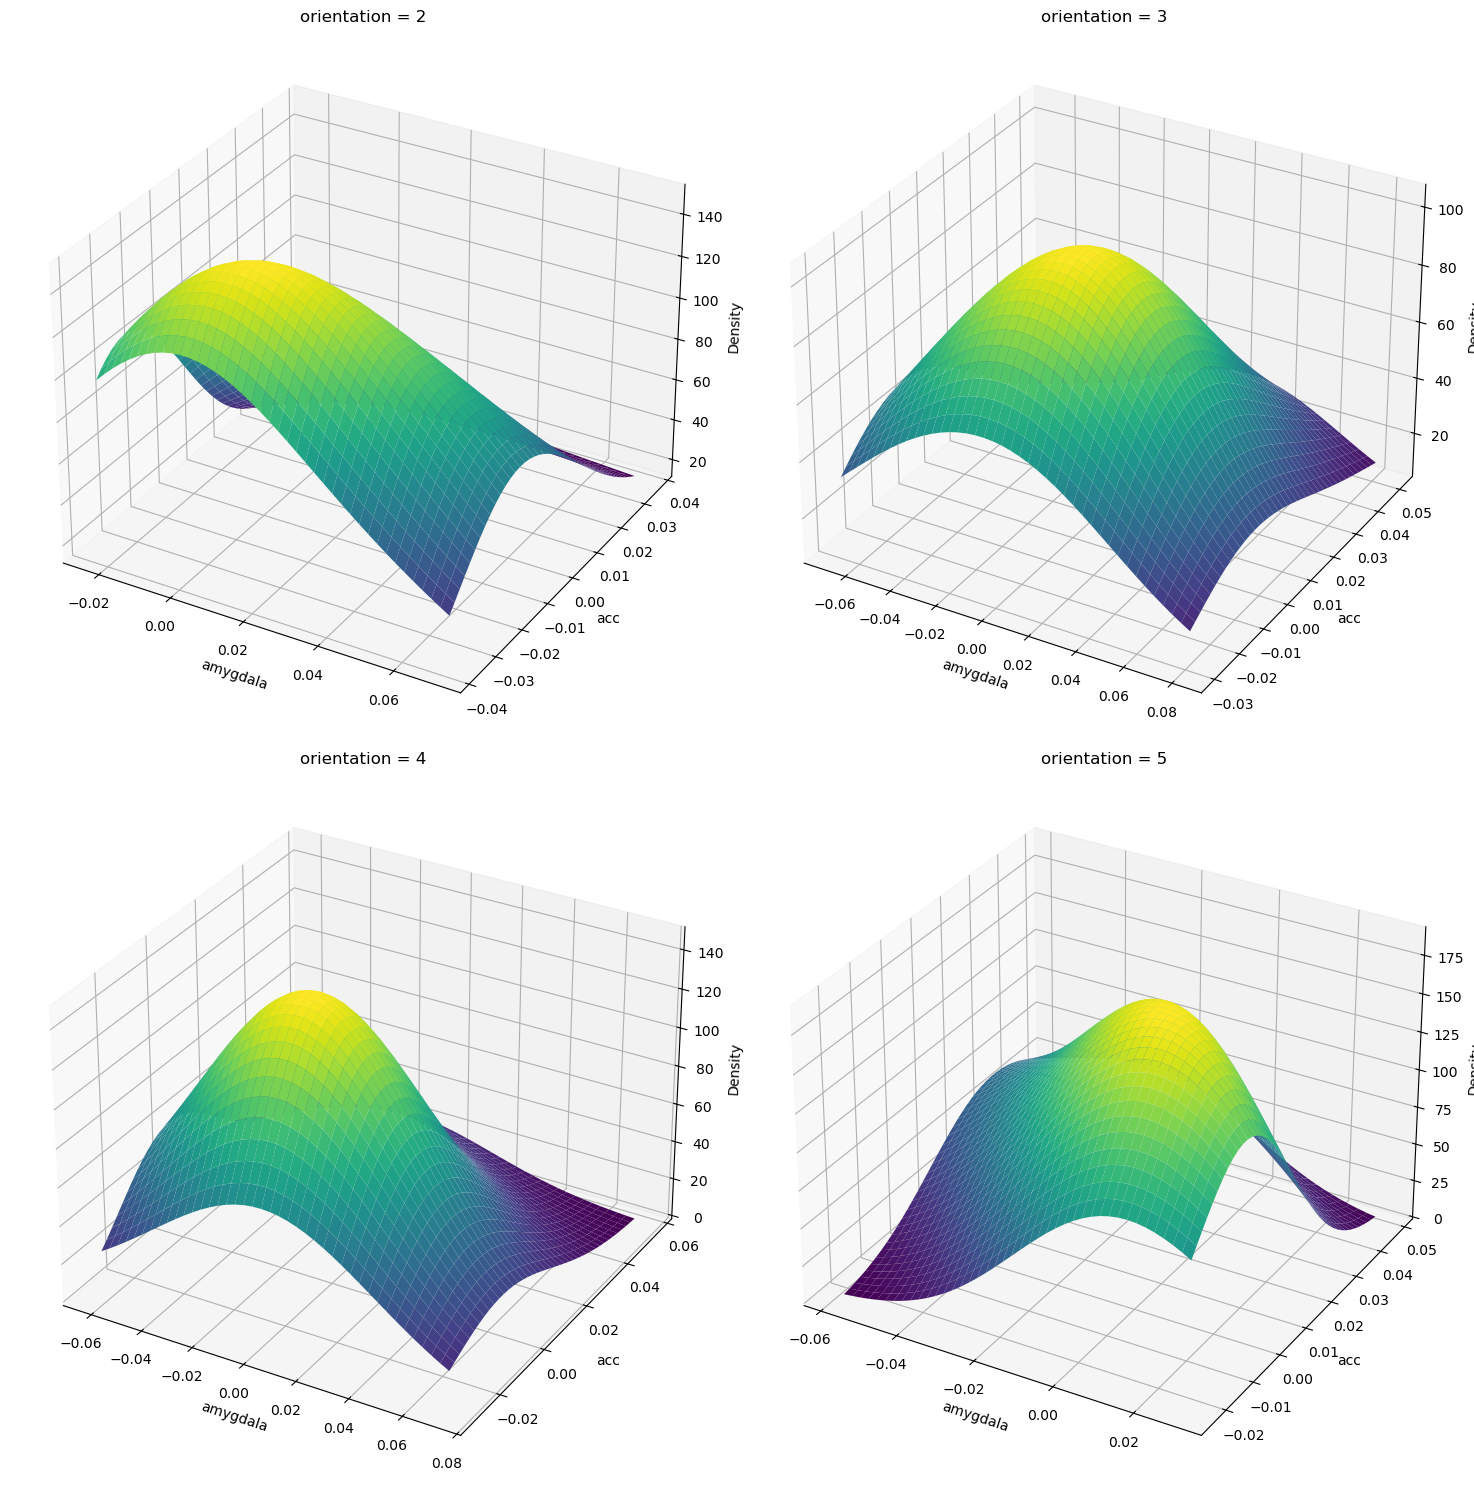

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), subplot_kw={"projection": "3d"})
axs = axs.flatten()

for index, i in enumerate(c):
    filtered_arr = data.loc[data["orientation"] == i, ["amygdala", "acc"]].to_numpy()

    grid_coords, x_grid, y_grid = create_3D_KDE(filtered_arr)

    kde = gaussian_kde(filtered_arr.T, bw_method=1.0)
    z_grid = kde(grid_coords).reshape(x_grid.shape)

    axs[index].plot_surface(x_grid, y_grid, z_grid, cmap="viridis", edgecolor="none")
    axs[index].set_title(f"orientation = {i}")
    axs[index].set_xlabel("amygdala")
    axs[index].set_ylabel("acc")
    axs[index].set_zlabel("Density")

plt.tight_layout()
plt.show()